In [81]:
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from cramersche import *


In [82]:
matrix_size_det_test = matrix_size ## Matrixgröße (type), Matzrix wird aber für den Typ -1 generiert

### Funktion zum berechen des Typs der Matrix und checken ob es sich um eine quadratische Matrix handelt

### Plotten der Zeit in Abhängigkeit der Anzahl der Elemente für die Berechnung der Determinante

#### Generieung von Testdaten

In [84]:
def gen_test(): # Funktion zum generieren von Testdaten
    data = []
    for i in range(1, matrix_size_det_test+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        try:
            start = timer() # Startzeit
            calc_determinant(matrix) # Berechnung der Determinante
            end = timer() # Endzeit
            error = 0 # Kein Fehler
        except:
            error = 1 # Fehler
        while error == 1: # Fehlerbehandlung
            matrix = generate_matrix(i, i)
            matrix = fill_matrix(matrix)
            try:
                start = timer() # Startzeit
                calc_determinant(matrix) # Berechnung der Determinante
                end = timer() # Endzeit
                error = 0 # Kein Fehler
            except:
                error = 1 # Fehler
        
        time = end - start # Zeitdifferenz
        data.append([i*i, time]) # Hinzufügen der Daten
    return data

In [111]:
data = gen_test()
for i in range(100):
    new_data = gen_test()
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 100 # Mittelwertbildung

data_det = data

#### Plotten der Daten

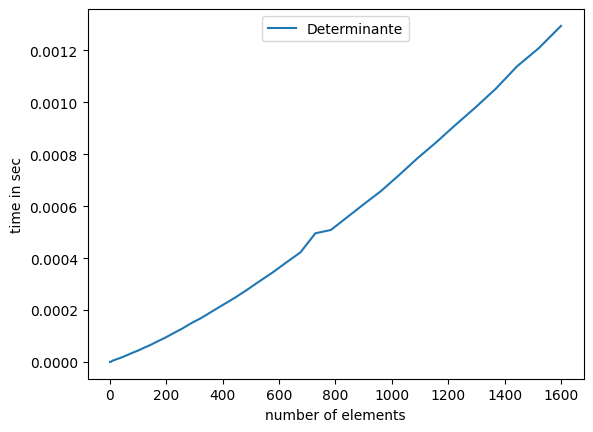

In [112]:
x = [data_det[i][0] for i in range(len(data_det))]
y = [data_det[i][1] for i in range(len(data_det))]

plt.plot(x, y, label="Determinante")
plt.ylabel("time in sec")
plt.xlabel("number of elements")
leg = plt.legend(loc='upper center')
plt.show()



    

### Simulierung Cramerisce Regel

#### Generierung von Testdaten

In [113]:
# Beispielrechung
matrix = [[3,-1, -1], [-1,3, -1], [-1,-1, 3], ]
loesung = [20,-20, 5]
print(cramerische_regel(matrix, loesung))

[6.25, -3.75, 2.5000000000000004]


In [88]:
def gen_test_matrix_mit_loesung(size): # Funktion zum generieren von Testdaten
    data = []
    for i in range(1, size+1):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        loesung = []
        for j in range(i): # Generierung des Lösungvektors
            loesung.append(randint(0, 10))
            try:
                start = timer()
                result = cramerische_regel(matrix, loesung) # Berechnung der Lösung
                end = timer()
                error = 0
            except:
                error = 1
            while error == 1:
                matrix = generate_matrix(i, i)
                matrix = fill_matrix(matrix)
                loesung = []
                for j in range(i):
                    loesung.append(randint(0, 10))
                try:
                    start = timer()
                    result = cramerische_regel(matrix, loesung)
                    end = timer()
                    error = 0
                except:
                    error = 1
        time = end - start
        data.append([i*i, time])
    return data, result

In [96]:
# Generierung von Testdaten und Mittelwertbildung
data, result = gen_test_matrix_mit_loesung(matrix_size)
for i in range(3):
    new_data, new_result = gen_test_matrix_mit_loesung(matrix_size)
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 3
data_cra = data

#### Plotten der Daten

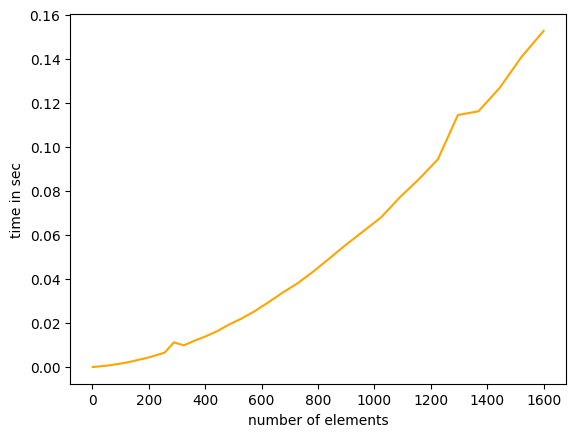

In [101]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] for i in range(len(data_cra))]
plt.plot(x_cra, y_cra, label="Cramerische Regel", color="orange")
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()

    

#### Vergleich zwischen Cramerisce Regel und Berechnung der Determinante

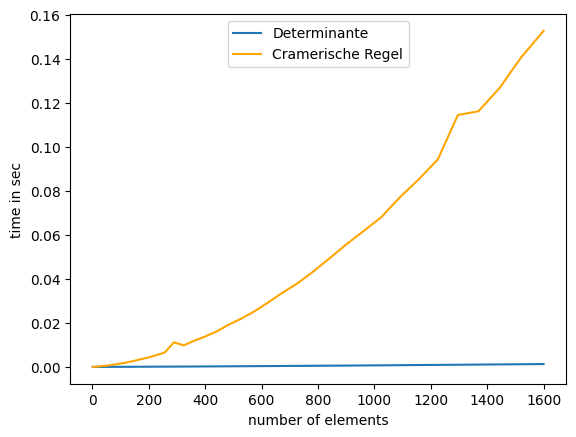

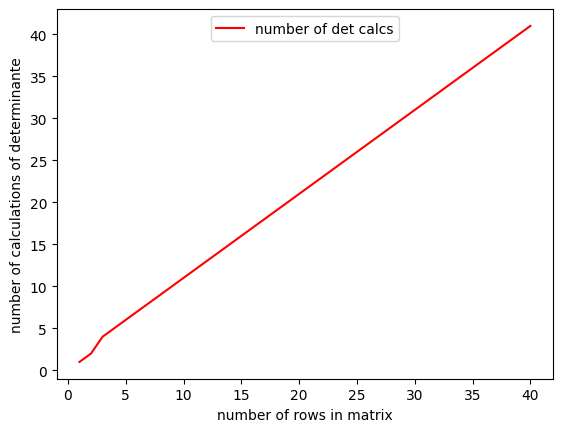

In [107]:
x_cra = [data_cra[i][0] for i in range(len(data_cra))]
y_cra = [data_cra[i][1] for i in range(len(data_cra))]
x_det = [data_det[i][0] for i in range(len(data_det))]
y_det = [data_det[i][1] for i in range(len(data_det))]
plt.plot(x_det, y_det, label="Determinante")
plt.plot(x_cra, y_cra, label="Cramerische Regel", color="orange")
plt.ylabel("time in sec")
plt.xlabel("number of elements")
leg = plt.legend(loc='upper center')
plt.show()

x_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
y_count = [(math.sqrt(data_cra[i][0])) for i in range(len(data_cra))]
for i in range(2, len(y_count)):
    y_count[i] += 1
plt.plot(x_count, y_count, label="number of det calcs", color="red")
plt.ylabel("number of calculations of determinante")
plt.xlabel("number of rows in matrix")
leg = plt.legend(loc='upper center')
plt.show()